# "Strength is Strength"

Author: Alessandro Tozcano

Course Project, UC Irvine, Math 10, W22

## Introduction

This notebook takes data recorded over a large period of time from the Open Powerlifting competition and analyzes how performance and other factors, primarily bodyweight,but also including age, are used to score competitors. I attempt to show how a famous statement in the powerlifting and athletics community holds true upon analyzing and visualizing the data.

## "Strength is Strength"


## Data Cleaning and Preparation
This section focuses on:
- Importing the necessary libraries to clean our data
- Loading and cleaning our DataFrame to meet our needs

Link to Dataset : https://www.kaggle.com/open-powerlifting/powerlifting-database

In [1]:
## Import necessary libraries

### Data Visualization and Cleaning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import altair as alt

### Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Extra Component
from mpl_toolkits import mplot3d
import matplotlib.style
from matplotlib.pyplot import figure


In [ ]:
## Loading the data
df = pd.read_csv('openpowerlifting.csv')


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
## We will split the dataset into Male and Female data frames
### I later decided to focus on the data from Male competitors since that is the community I would fall into
df_male = df[df['Sex'] == 'M' ].copy()
df_female = df[df['Sex']== 'F'].copy()

In [ ]:
df_male

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
41,Adrian Zwaan,M,SBD,Raw,80.0,80-999,M-OR,82.1,82.5,80.0,...,437.30,205.96,278.11,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
42,Aiden Westrip,M,SBD,Wraps,28.0,24-34,M-OR,82.0,82.5,210.0,...,411.82,397.62,615.81,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
43,Andrew Fella,M,SBD,Wraps,27.0,24-34,M-OR,89.2,90,230.0,...,416.86,401.80,622.52,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
44,Andrew Yuile,M,SBD,Wraps,36.0,35-39,M-OR,79.5,82.5,112.5,...,236.47,228.46,317.40,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
45,Anthony Provenza,M,SBD,Wraps,34.0,24-34,M-OR,114.7,125,-270.0,...,418.65,400.35,599.24,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,M,SBD,Raw,60.5,60-64,Masters 2,73.5,74,160.0,...,438.27,316.52,469.67,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423350,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,372.60,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423351,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,382.36,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


In [ ]:
## Create a Sub DataFrame with Bodyweight and Best bench max

### In our data, null values signify that a competitor did not participate in that lift.
### Negative values signify the weight that was attempted but failed
### I want to only analyze data from competitors that were able to complete all 3 lifts, specifically their best performing attempts.

df_male_clean = df_male.loc[:,['BodyweightKg','WeightClassKg','Age','Best3BenchKg','Best3SquatKg','Best3DeadliftKg','TotalKg','IPFPoints','Wilks','McCulloch','Glossbrenner']] # I wanted to include columns that I may decide to analyze
df_male_clean = df_male_clean.dropna().reset_index() # I wanted to reset the indices in this data as well as drop null values
df_male_clean = df_male_clean[df_male_clean['Best3BenchKg'] > 0].copy() # Removes rows with negative values
df_male_clean = df_male_clean[df_male_clean['Best3SquatKg'] > 0].copy() # Removes rows with negative values
df_male_clean = df_male_clean[df_male_clean['Best3DeadliftKg'] > 0].copy() # Removes rows with negative values
df_male_clean = df_male_clean.drop('index',axis = 1) # When I reset the indices 
df_male_clean = df_male_clean.head(5000) # forsake of efficiency and not running out of RAM, I trimmed the values down to the first 5000 since originally our data consisted of close to a million rows.


In [ ]:
## Here is the finalized clean data in a Pandas DataFrame
df_male_clean

,BodyweightKg,WeightClassKg,Age,Best3BenchKg,Best3SquatKg,Best3DeadliftKg,TotalKg,IPFPoints,Wilks,McCulloch,Glossbrenner
0,82.1,82.5,80.0,72.5,100.0,145.0,317.5,278.11,213.32,437.30,205.96
1,82.0,82.5,28.0,135.0,227.5,250.0,612.5,615.81,411.82,411.82,397.62
2,89.2,90,27.0,140.0,260.0,250.0,650.0,622.52,416.86,416.86,401.80
3,79.5,82.5,36.0,77.5,125.0,142.5,345.0,317.40,236.47,236.47,228.46
4,114.7,125,34.0,180.0,270.0,270.0,720.0,599.24,418.65,418.65,400.35
...,...,...,...,...,...,...,...,...,...,...,...
4995,74.0,74,35.5,100.0,170.0,210.0,480.0,500.78,345.27,345.27,334.09
4996,93.0,93,22.5,105.0,192.5,187.5,485.0,430.56,304.67,304.67,293.38
4997,105.0,105,27.5,137.5,165.0,190.0,492.5,404.99,294.30,294.30,282.40
4998,93.0,93,58.5,110.0,185.0,200.0,495.0,441.19,310.95,401.44,299.43


## Training and Evaluating of Linear Regression Models
This Section focuses on:
- Fitting two Linear Regression models, using data split into training and test sets
- Analyzing their coefficients, intercepts and score to see how the models fit

### Why we train two models: 
During my research for the project, most of the information found on the web leads one to believe IPFPoints are calculated taking ones total weight lifted and performing some sort of standardization based on ones bodyweight/age or other factors that could contribute to disparities in strength among individuals aside from genetic differences.

In [ ]:
### We train a Linear Model for IPFPoints with TotalKg and BodyweightKg Respectively
reg_IPFPoints_TotalKg = LinearRegression()
X_a = df_male_clean[['TotalKg']]
y_a = df_male_clean[['IPFPoints']]
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a,y_a,test_size=0.2)
reg_IPFPoints_TotalKg.fit(X_train_a,y_train_a)

reg_IPFPoints_BodyweightKg = LinearRegression()
X_b = df_male_clean[['BodyweightKg']]
y_b = df_male_clean[['IPFPoints']]
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b,y_b,test_size=0.2)
reg_IPFPoints_BodyweightKg.fit(X_train_b,y_train_b)

LinearRegression()

In [ ]:
### Checking the performance of our Regression Models
## We check the performance, intercept and coefficient of TotalKg vs IPFPoints

IPFPoints_TotalKg_score = reg_IPFPoints_TotalKg.score(reg_IPFPoints_TotalKg.predict(X_test_a),y_test_a)
IPFPoints_TotalKg_intercept = reg_IPFPoints_TotalKg.intercept_
IPFPoints_TotalKg_coeff = reg_IPFPoints_TotalKg.coef_

## We check the performance, intercept and coefficient of BodyweightKg vs IPFPoints

IPFPoints_BodyweightKg_score = reg_IPFPoints_BodyweightKg.score(reg_IPFPoints_TotalKg.predict(X_test_b),y_test_b)
IPFPoints_BodyweightKg_intercept = reg_IPFPoints_BodyweightKg.intercept_
IPFPoints_BodyweightKg_coeff = reg_IPFPoints_BodyweightKg.coef_

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BodyweightKg
Feature names seen at fit time, yet now missing:
- TotalKg

  warnings.warn(message, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("IPFP vs TotalKg Score:" ,IPFPoints_TotalKg_score)
print("IPFP vs TotalKg Intercept:" ,IPFPoints_TotalKg_intercept)
print("IPFP vs TotalKg Coefficient:" ,IPFPoints_TotalKg_coeff)

print("IPFP vs Bodyweight Score:" ,IPFPoints_BodyweightKg_score)
print("IPFP vs Bodyweight Intercept:" ,IPFPoints_BodyweightKg_intercept)
print("IPFP vs Bodyweight Coefficient:" ,IPFPoints_BodyweightKg_coeff)

IPFP vs TotalKg Score: 0.38964791080676675
IPFP vs TotalKg Intercept: [126.30744004]
IPFP vs TotalKg Coefficient: [[0.67819231]]
IPFP vs Bodyweight Score: -0.04659117056208717
IPFP vs Bodyweight Intercept: [509.49125686]
IPFP vs Bodyweight Coefficient: [[0.24956144]]


## The analysis and interpretation of our data:
### IPF Points vs Total Weight Lifted:
- IPFP vs TotalKg Score: 0.41103225603882965
- IPFP vs TotalKg Intercept: 124.81083149
- IPFP vs TotalKg Coefficient: 0.6824507

### IPF Points vs Bodyweight:
- IPFP vs Bodyweight Score: -0.08219358849842218
- IPFP vs Bodyweight Intercept: 506.92619584
- IPFP vs Bodyweight Coefficient: 0.28317706

### Off First Glance: 
We see that neither model fits the data to a great degree. However, using total weight lifted is the superior factor when it comes to IPF Points scored. Going deeper into the numbers we do see positive correlations for both models, with bodyweight providing a higher bias than using total weight lifted as a metric.


## Visualization of Our Two Models:
This section focuses on:
- Adding Predicted values to the cleaned dataframe
- Preparing Altair charts to represent true values of both comparisons
- Preparing Altair charts to display the linear models layered over true values 

In [ ]:
### Adding the predicted values from our two models to our clean data frame of male data
df_male_clean['Pred_IPFP_TotalKg'] = reg_IPFPoints_TotalKg.predict(df_male_clean[['TotalKg']]).copy()
df_male_clean['PredIPFP_BodyweightKg'] = reg_IPFPoints_BodyweightKg.predict(df_male_clean[['BodyweightKg']]).copy()


In [ ]:
TotalKg_IPFPoints = alt.Chart(df_male_clean).mark_circle().encode(
    x = alt.X('TotalKg' ,
    scale=alt.Scale(zero=False)),
    y = alt.Y('IPFPoints',
    scale=alt.Scale(zero=False)),
    color = 'WeightClassKg',
    opacity = 'Age'
   
)

Pred_TotalKg_IPFP_Line = alt.Chart(df_male_clean).mark_line(color = 'black').encode(
    x = 'TotalKg',
    y = 'Pred_IPFP_TotalKg',
    
)


Bodyweight_IPFPoints = alt.Chart(df_male_clean).mark_circle().encode(
     x = alt.X('BodyweightKg' ,
    scale=alt.Scale(zero=False)),
    y = alt.Y('IPFPoints',
    scale=alt.Scale(zero=False)),
    color = 'Age'
)

Pred_BodyweightKg_IPFP_Point = alt.Chart(df_male_clean).mark_point(color = 'red',opacity = 0.1).encode(
    x = 'BodyweightKg',
    y = 'Pred_IPFP_TotalKg', 
)

In [ ]:
### This is a Display of our two linear regression models with their respective charts.
### We can arrive at the following conclusions from this display
### Firstly, we see that TotalKg and IPFPoints retain a strong correlation
### Secondly, we see that our model does a good job of "idealizing" what an ideal system of deriving IPFPoints from bodyweight would provide, nonetheless
### we still arrive at the conclusion that Bodyweight does not have as significant of a weight in assigning a IPFPoint Score as TotalKg lifted.

TotalKg_IPFPoints + Pred_TotalKg_IPFP_Line | Bodyweight_IPFPoints + Pred_BodyweightKg_IPFP_Point

alt.HConcatChart(...)

## The analysis and interpretation of our data visualization:
As the titles and axes suggest, the graph representing Total Weight vs IPF Points is depictied on the left and Bodyweight vs IPF Points is depicted on the right. These charts. On the right, our visualization can be interpreted as what IPF scored could be expected from an average candidate at that respective bodyweight. This becomes more clear from our color coding by weight class, we can almost see how members of the same weight class follow a very linear trend between total kilograms lifted and IPF score. Taking this into consideration we can take our linear model as a representation of the trend an average of all weightclasses would follow.

From a standpoint meant purely to critisize the performance and numerical accuracy of our linear model, both do a poor job. Hollistically our models tell us a lot more about the data. Expectedly, we see that our linear model on the left seems like a simplified interpretation of our data, we can extrapolate that this line represents the average expected performance for an average participant.  This leads one to believe that there are a multitude of other factors outside bodyweight that contribute to an IPF score in this competition.

## 3D Visualization
This section focuses on:
- Visualizing weight lifted, bodyweight, IPF score on a 3D model

### The following figure:
This figure is essentially a representation of IPFP score based on both total kilograms lifted and the contestants respective bodyweight. Our results on the display confirm how we believe that Total Kilograms lifted has a far greater weight in calculating IPF Score than bodyweight.

In [ ]:
%matplotlib inline 

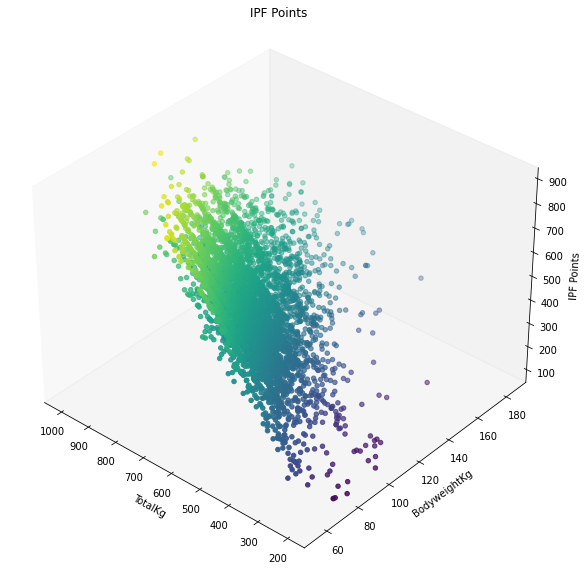

In [ ]:
### Visualization of our true data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# We will draw data from df_male_clean
x = df_male_clean['TotalKg']
y = df_male_clean['BodyweightKg']
z = df_male_clean[['IPFPoints']]
bodyweight_class = df_male_clean['WeightClassKg']
ax.scatter3D(x,y,z,c=z,cmap='viridis')
ax.set_xlabel('TotalKg')
plt.axis([max(x),min(x),min(y),max(y)])
ax.set_ylabel('BodyweightKg')
ax.set_zlabel('IPF Points')
ax.set_title('IPF Points')
ax.grid(False)
ax.view_init(35,-49)

fig.set_size_inches(10,10)

## Summary

In this project, a combination of data cleaning, linear regression and both 2-Dimensional and 3-Dimensional data visualization was used. The project narrowed in on an analysis between bodyweight and strength measured by total kilograms lifted across 3 different powerlifts, the bench press, squat and deadlift. This analysis was able to conclude that strength measured by total kilograms lifted was a crucial component in the ranking of strength.

## References

Links I used to help me with this project:

- https://www.kaggle.com/open-powerlifting/powerlifting-database
- https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
- https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python 
- https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/#:~:text=In%20Matplotlib%20we%20can%20reverse,methods%20for%20the%20pyplot%20object.
- https://likegeeks.com/3d-plotting-in-python/#Set_3D_plot_colors_based_on_class 
- https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c46f921-7d0c-4a25-8d92-4848e84eb693' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>